### 거래금액(만원)/전용면적(㎡) -> 통일

In [1]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정

In [3]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### read_csv 하는데 필요한 파일 목록 (1)
- ./fin_data/서울시_5대_범죄_발생건수(2017)_최종.csv

In [5]:
df_crime_2017 = pd.read_csv("./fin_data/서울시_5대_범죄_발생건수(2017)_10만명당_추가_최종.csv",thousands = ',')
df_crime_2018 = pd.read_csv("./fin_data/서울시_5대_범죄_발생건수(2018)_10만명당_추가_최종.csv",thousands = ',')
df_crime_2019 = pd.read_csv("./fin_data/서울시_5대_범죄_발생건수(2019)_10만명당_추가_최종.csv",thousands = ',')

### read_csv 하는데 필요한 파일 목록 (2)
- ./data/2017년도_서울시_아파트_평균금액.csv
- ./data/2018년도_서울시_아파트_평균금액.csv
- ./data/2019년도_서울시_아파트_평균금액.csv
- ./data/2020년도_서울시_아파트_평균금액.csv

In [6]:
apart_17= pd.read_csv("./data/2017년도_서울시_아파트_평균금액.csv",thousands = ',')
apart_18= pd.read_csv("./data/2018년도_서울시_아파트_평균금액.csv",thousands = ',')
apart_19= pd.read_csv("./data/2019년도_서울시_아파트_평균금액.csv",thousands = ',')
apart_20= pd.read_csv("./data/2020년도_서울시_아파트_평균금액.csv",thousands = ',')

In [7]:
apart_17.head(2)
apart_18.head(2)
apart_19.head(2)
apart_20.head(2)

,구,년도,거래금액(만원)/전용면적(㎡),거래금액(만원)/1평,거래금액(만원)/국민평수(32평)
0,강남구,2017,1466.082319,4846.552940,155089.694095
1,강동구,2017,746.577889,2468.025987,78976.831588


,구,년도,거래금액(만원)/전용면적(㎡),거래금액(만원)/1평,거래금액(만원)/국민평수(32평)
0,강남구,2018,1702.489273,5628.063501,180098.032036
1,강동구,2018,858.382930,2837.629413,90804.141206


,구,년도,거래금액(만원)/전용면적(㎡),거래금액(만원)/1평,거래금액(만원)/국민평수(32평)
0,강남구,2019,2052.023430,6783.548274,217073.544761
1,강동구,2019,1007.348562,3330.077765,106562.488492


,구,년도,거래금액(만원)/전용면적(㎡),거래금액(만원)/1평,거래금액(만원)/국민평수(32평)
0,강남구,2020,2086.827856,6898.604225,220755.335188
1,강동구,2020,1169.990642,3867.737514,123767.600450


## 2017 ~ 2020년 구별 부동산 ㎡당 가격과 범죄건수와의 상관계수 파악

In [8]:
np_price_2017 = np.array(apart_17['거래금액(만원)/전용면적(㎡)'][:25])
np_price_2017

array([1466.08231947,  746.5778891 ,  514.43297775,  652.27198394,
        572.53004093,  791.12242673,  543.78460523,  473.8227099 ,
        541.10912229,  468.88309882,  610.60856033,  746.29361111,
        835.28204493,  662.287611  , 1238.21648705,  829.17522968,
        576.89019567, 1029.91452374,  777.99620316,  717.65061187,
       1012.64060492,  562.80113063,  696.59505724,  761.22152907,
        498.25494715])

In [9]:
np_price_2018 = np.array(apart_18['거래금액(만원)/전용면적(㎡)'][:25])
np_price_2018

array([1702.48927293,  858.38292953,  563.43932434,  728.9633438 ,
        642.22767929,  946.45879632,  595.38574957,  516.09210356,
        601.71860247,  504.36474672,  693.12486921,  879.35545008,
        989.61806639,  727.43086307, 1461.55106106, 1048.79863096,
        629.73076652, 1203.05293686,  811.35913366,  845.07960225,
       1198.84517606,  627.25134087,  764.33779543,  871.60718699,
        541.18768602])

In [10]:
np_price_2019 = np.array(apart_19['거래금액(만원)/전용면적(㎡)'][:25])
np_price_2019

array([2052.02342977, 1007.3485618 ,  665.26652752,  852.65655069,
        757.87239548, 1105.81601361,  707.52547477,  619.21967843,
        703.65567636,  594.08315594,  841.10380023, 1066.52803573,
       1222.07469922,  922.64959593, 1755.4283754 , 1245.32273153,
        771.37188491, 1440.6605346 , 1038.16740918, 1039.32717437,
       1463.55699415,  729.63173694, 1015.94952308, 1024.5257994 ,
        660.86379701])

In [11]:
np_price_2020 = np.array(apart_20['거래금액(만원)/전용면적(㎡)'][:25])
np_price_2020

array([2086.8278562 , 1169.99064188,  771.14885443,  964.74051875,
        871.0855337 , 1291.45245528,  769.80626769,  739.46235451,
        843.89685976,  675.16037057,  995.65211275, 1230.7600795 ,
       1344.64439892, 1038.87046846, 1914.60928472, 1471.15854419,
        914.7996596 , 1601.00668612, 1143.55178554, 1180.24281422,
       1594.0309173 ,  827.5980902 , 1034.72188611, 1138.63450117,
        760.15370425])

### 2017 ~ 2020년 서울특별시 각 구별 부동산 ㎡당 거래금액과 범죄건수와의 상관계수 계산

In [12]:
df_crime_2017.head(2)

,기간,자치구,범죄_발생_합계,10만명 당 범죄 발생 건수
0,2017,강남구,7720,1388.079775
1,2017,강동구,4261,976.793979


In [13]:
np_crime_count_2017 = np.array(df_crime_2017['범죄_발생_합계'][:25])
np_crime_count_2018 = np.array(df_crime_2018['범죄_발생_합계'][:25])
np_crime_count_2019 = np.array(df_crime_2019['범죄_발생_합계'][:25])

In [14]:
np_crime_count_2017
np_crime_count_2018
np_crime_count_2019

array([7720, 4261, 3393, 5135, 5525, 4646, 4895, 3265, 4209, 1999, 3975,
       3330, 5278, 3113, 4708, 2767, 3434, 5576, 3882, 5969, 4060, 3883,
       4057, 4184, 4571], dtype=int64)

array([7513, 3919, 3437, 4629, 5026, 3915, 4810, 3293, 4007, 2249, 3680,
       3100, 5172, 2802, 4726, 2457, 3042, 5807, 3515, 5840, 3411, 3590,
       3690, 4030, 4288], dtype=int64)

array([7304, 4014, 3838, 4924, 5328, 4011, 4707, 3105, 4153, 2110, 3692,
       3400, 4842, 2943, 5542, 2512, 2877, 5698, 3214, 5820, 3313, 3880,
       3846, 4327, 4268], dtype=int64)

### 상관계수
- 공분산의 단위는 직감적으로 이해하기 어려우므로, 단위에 의존하지 않는 상관을 나타내는 지표
- 시험 점수간의 공분산 (점수 X 점수), 키와 점수간의 공분산 (cm X 점수)
- 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않음



### 수식으로 계산
- 예시) -> np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))




- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계궁금한거

In [15]:
# 수식으로 계산

np.cov(np_price_2017,np_crime_count_2017, ddof=0)[0,1] / (np.std(np_price_2017) * np.std(np_crime_count_2017)) # 0.5749279368530019
np.cov(np_price_2018,np_crime_count_2018, ddof=0)[0,1] / (np.std(np_price_2018) * np.std(np_crime_count_2018)) # 0.5512893398805467
np.cov(np_price_2019,np_crime_count_2019, ddof=0)[0,1] / (np.std(np_price_2019) * np.std(np_crime_count_2019)) # 0.5503137301227112

0.5749279368530019

0.5512893398805467

0.5476094614677782

- 상관계수가 +0.3과 +0.7 사이이므로, 뚜렷한 양적 선형관계임을 알 수 있다!!

## 산점도

In [16]:
# 기울기와 절편
poly_fit = np.polyfit(np_price_2017, np_crime_count_2017, 1)

poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x 좌표를 생성
xs = np.linspace(np_price_2017.min(), np_price_2017.max())

# xs에 대응하는 y좌표를 구한
ys = poly_1d(xs)

Text(0.5, 0, '2017년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')

Text(0, 0.5, '2017년 각 구별 범죄 건수')

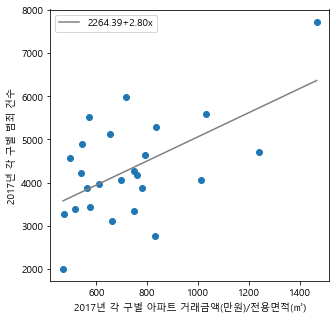

<Figure size 432x288 with 0 Axes>

In [17]:
## 2017년 부동산 금액과 범죄건수와의 산점도

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.set_xlabel('2017년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')
ax.set_ylabel('2017년 각 구별 범죄 건수')

# 산점도
ax.scatter(np_price_2017, np_crime_count_2017)

ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

plt.savefig('./fin_data/2017_부동산금액_범죄건수.png')

In [18]:
# 기울기와 절편
poly_fit = np.polyfit(np_price_2018, np_crime_count_2018, 1)

poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x 좌표를 생성
xs = np.linspace(np_price_2018.min(), np_price_2018.max())

# xs에 대응하는 y좌표를 구한
ys = poly_1d(xs)

Text(0.5, 0, '2018년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')

Text(0, 0.5, '2018년 각 구별 범죄 건수')

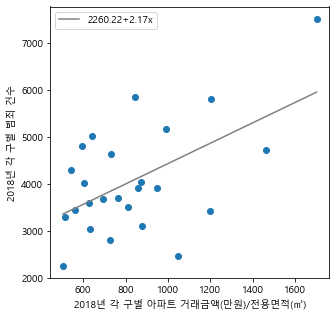

<Figure size 432x288 with 0 Axes>

In [19]:
## 2018년 부동산 금액과 범죄건수와의 산점도

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.set_xlabel('2018년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')
ax.set_ylabel('2018년 각 구별 범죄 건수')

# 산점도
ax.scatter(np_price_2018, np_crime_count_2018)

ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

plt.savefig('./fin_data/2018_부동산금액_범죄건수.png')

In [20]:
# 기울기와 절편
poly_fit = np.polyfit(np_price_2019, np_crime_count_2019, 1)

poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x 좌표를 생성
xs = np.linspace(np_price_2019.min(), np_price_2019.max())

# xs에 대응하는 y좌표를 구한
ys = poly_1d(xs)

Text(0.5, 0, '2019년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')

Text(0, 0.5, '2019년 각 구별 범죄 건수')

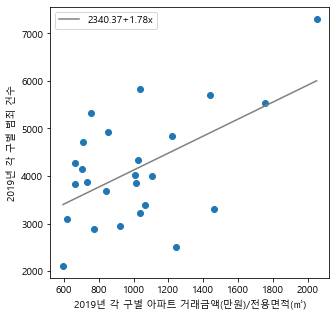

<Figure size 432x288 with 0 Axes>

In [21]:
## 2019년 부동산 금액과 범죄건수와의 산점도

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.set_xlabel('2019년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')
ax.set_ylabel('2019년 각 구별 범죄 건수')

# 산점도
ax.scatter(np_price_2019, np_crime_count_2019)

ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

plt.savefig('./fin_data/2019_부동산금액_범죄건수.png')